## Data Analytics
### Lab 1.
Alicja Bogusz


1. Create a jupyter notebook.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, beta 

2. Using ```numpy.random``` generate arrays of:
    - 1000 samples of uniform distribution on interval $[0,1]$
    - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
    - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
    - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
    - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices


$$\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}$$



$$\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}$$


In [73]:
uniform_dist = np.random.uniform(0,1, 1000)
normal_dist_dev1 = np.random.normal(0, 1, 1000)
normal_dist_dev10 = np.random.normal(0, 10, 1000)
beta_dist1 = np.random.beta(1, 1, 1000)
beta_dist2 = np.random.beta(2, 2, 1000)
beta_dist3 = np.random.beta(3, 9, 1000)
mean = [0, 0]
normal_dist_2d_1 = np.random.multivariate_normal(mean, [[1, 0], [0, 1]], 10000)
normal_dist_2d_2 = np.random.multivariate_normal(mean, [[2, 1], [1, 2]], 10000)

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).


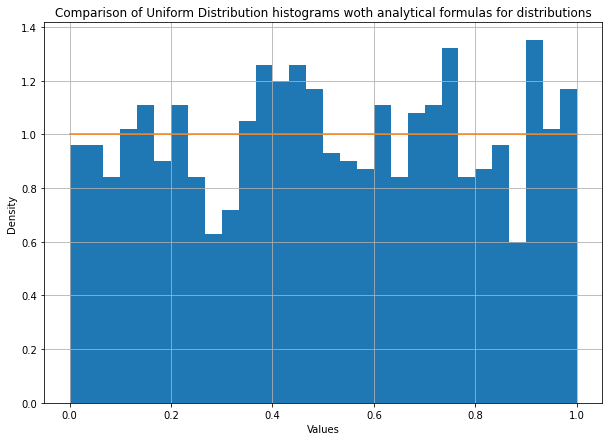

In [74]:
plt.figure(figsize = (10,7))
_, bins, _ = plt.hist(uniform_dist, 30, density=True)
plt.plot(bins, np.ones_like(bins))
plt.title('Comparison of Uniform Distribution histograms woth analytical formulas for distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid()
plt.show()

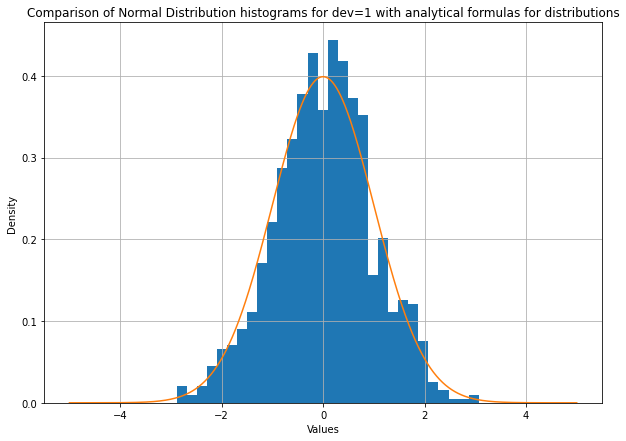

In [75]:
plt.figure(figsize = (10,7))
plt.hist(normal_dist_dev1, bins = 30, density=True)
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.title('Comparison of Normal Distribution histograms for dev=1 with analytical formulas for distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid()
plt.show()

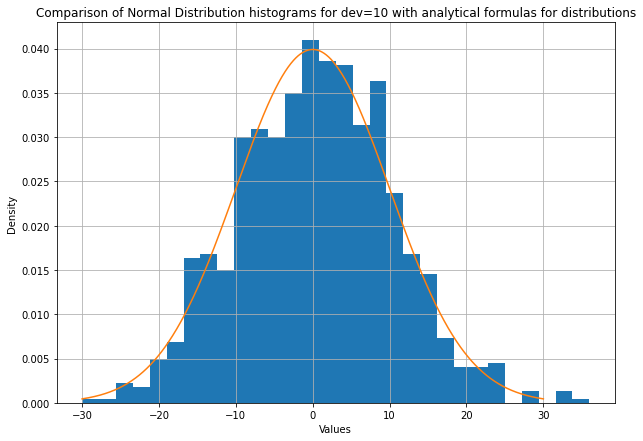

In [76]:
plt.figure(figsize = (10,7))
plt.hist(normal_dist_dev10, bins = 30, density=True)
x = np.linspace(-30, 30, 1000)
y = norm.pdf(x, 0, 10)
plt.plot(x, y)
plt.title('Comparison of Normal Distribution histograms for dev=10 with analytical formulas for distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid()
plt.show()

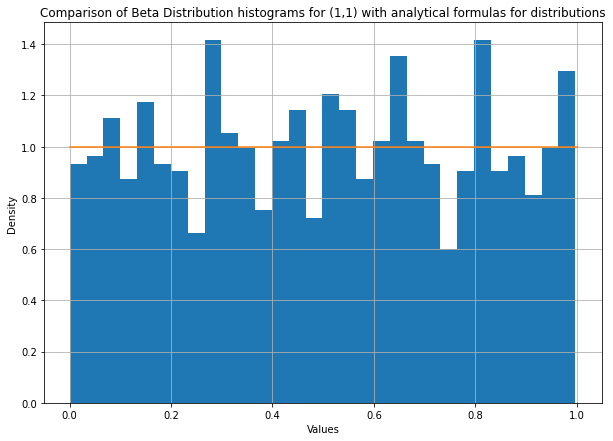

In [77]:
plt.figure(figsize = (10,7))
plt.hist(beta_dist1, bins = 30, density=True)
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 1, 1)
plt.plot(x, y)
plt.title('Comparison of Beta Distribution histograms for (1,1) with analytical formulas for distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid()
plt.show()

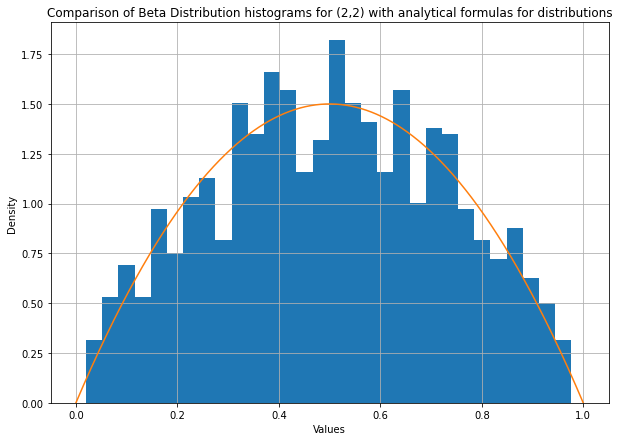

In [78]:
plt.figure(figsize = (10,7))
plt.hist(beta_dist2, bins = 30, density=True)
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 2, 2)
plt.plot(x, y)
plt.title('Comparison of Beta Distribution histograms for (2,2) with analytical formulas for distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid()
plt.show()

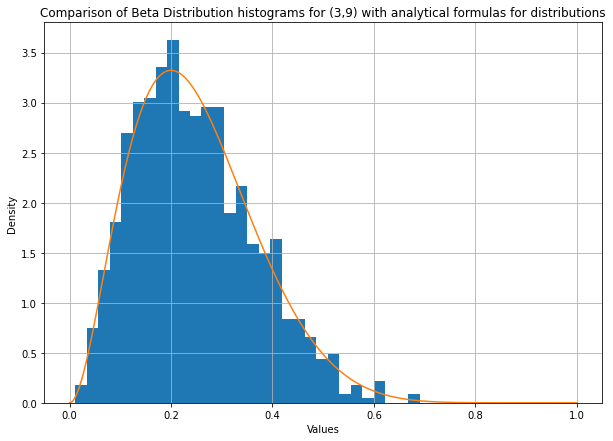

In [79]:
plt.figure(figsize = (10,7))
plt.hist(beta_dist3, bins = 30, density=True)
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 3, 9)
plt.plot(x, y)
plt.title('Comparison of Beta Distribution histograms for (3,9) with analytical formulas for distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid()
plt.show()

4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).

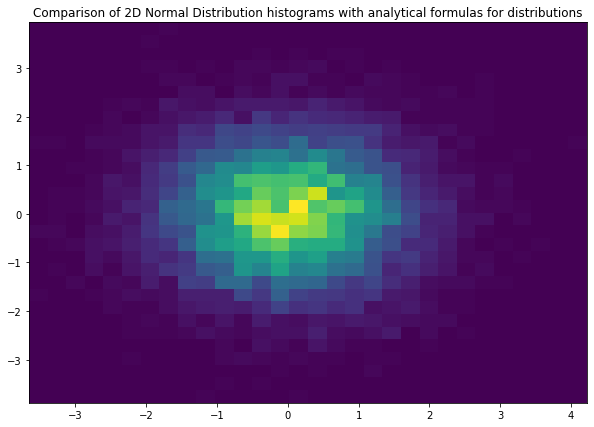

In [80]:
plt.figure(figsize=(10,7))
plt.hist2d(normal_dist_2d_1[:,0], normal_dist_2d_1[:,1], bins=30)
plt.title('Comparison of 2D Normal Distribution histograms with analytical formulas for distributions')
plt.show()

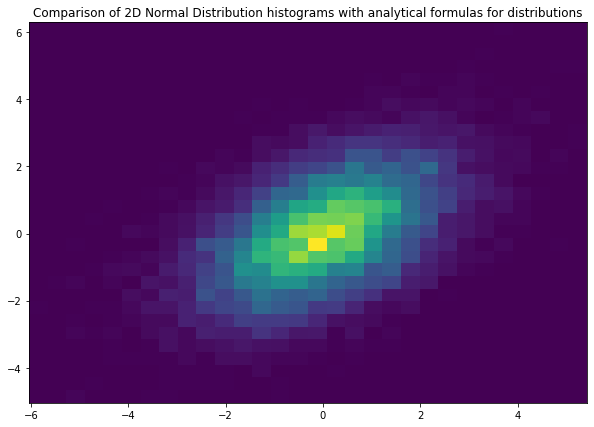

In [81]:
plt.figure(figsize=(10,7))
plt.hist2d(normal_dist_2d_2[:,0], normal_dist_2d_2[:,1], bins=30)
plt.title('Comparison of 2D Normal Distribution histograms with analytical formulas for distributions')
plt.show()

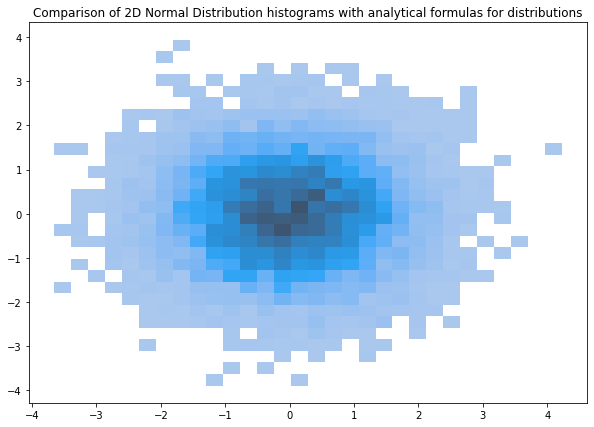

In [82]:
plt.figure(figsize=(10,7))
sns.histplot(x=normal_dist_2d_1[:, 0], y=normal_dist_2d_1[:, 1], bins=30)
plt.title('Comparison of 2D Normal Distribution histograms with analytical formulas for distributions')
plt.show()

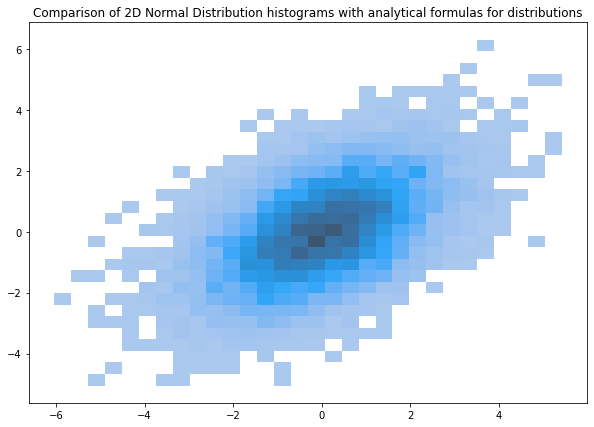

In [83]:
plt.figure(figsize=(10,7))
sns.histplot(x=normal_dist_2d_2[:, 0], y=normal_dist_2d_2[:, 1], bins=30)
plt.title('Comparison of 2D Normal Distribution histograms with analytical formulas for distributions')
plt.show()

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)

$$\begin{aligned}
y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
\mu={}& \alpha + \beta x\\
\alpha\sim{}&\mathrm{Normal}(2,0.1)\\
\beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
x\sim{}&\mathrm{Normal}(0,3)\\
\sigma\sim{}&\mathrm{HalfNormal}(0,1)
\end{aligned}$$


In [84]:
sigma = np.abs(np.random.normal(0, 1, 1000))
x = np.random.normal(0, 3, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
alfa = np.random.normal(2, 0.1, 1000)
u = alfa + beta * x
y = np.random.normal(u, sigma, 1000)

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).  


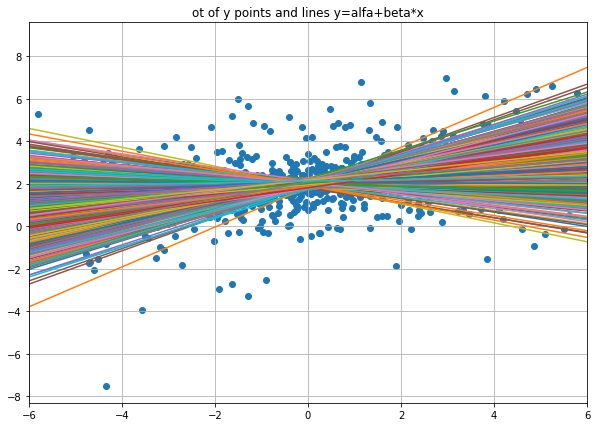

In [87]:
plt.figure(figsize=(10,7))
plt.scatter(x, y)
x_plot = np.linspace(-6, 6, 100)
for i in range(1000):
    y_plot = alfa[i] + beta[i] * x_plot
    plt.plot(x_plot, y_plot)
plt.xlim(-6,6)
plt.title('ot of y points and lines y=alfa+beta*x')
plt.grid()
plt.show()